In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

from sklearn.preprocessing import StandardScaler
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import Data
df=pd.read_csv("ASGR.csv")
df.tail()

,timestamp,open,low,high,close,volume
5665,2023-01-02,950,945,960,950,540200
5666,2023-01-03,950,945,955,950,140700
5667,2023-01-04,950,930,950,940,405700
5668,2023-01-05,935,920,935,925,823700
5669,2023-01-06,925,910,930,930,150800


In [3]:
import pandas as pd
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

# Menginisialisasi tanggal awal
start_date = datetime(2023,1,7).date()

# Menginisialisasi tanggal akhir
end_date = datetime(2023, 12, 31).date()

# Membuat daftar tanggal
dates = []
current_date = start_date

while current_date <= end_date:
    # Mengecek apakah hari saat ini bukan Sabtu atau Minggu
    if current_date.weekday() < 5:
        dates.append(current_date)
    
    # Melangkah ke tanggal berikutnya
    current_date += timedelta(days=1)

# Membuat DataFrame dengan kolom 'Tanggal'
timestamp = pd.DataFrame({'timestamp': dates})

# Menampilkan DataFrame
# print(timestamp)

In [4]:
merged_df = pd.concat([df, timestamp])
output_file = "ASGR_update.csv"
merged_df.to_csv(output_file, index=False)

In [5]:
df=pd.read_csv("ASGR_update.csv",parse_dates = ['timestamp'], index_col = 'timestamp')
df.tail()

,open,low,high,close,volume
timestamp,,,,,
2023-12-25,NaN,NaN,NaN,NaN,NaN
2023-12-26,NaN,NaN,NaN,NaN,NaN
2023-12-27,NaN,NaN,NaN,NaN,NaN
2023-12-28,NaN,NaN,NaN,NaN,NaN
2023-12-29,NaN,NaN,NaN,NaN,NaN


## Analisis Data ##

In [201]:
df=pd.read_csv("C:/Users/atauf/Downloads/ASII.csv")
df.tail()

,timestamp,open,low,high,close,volume
5665,2023-01-02,5725,5625,5725,5700,12068800
5666,2023-01-03,5675,5625,5700,5650,22854400
5667,2023-01-04,5650,5625,5700,5675,32578900
5668,2023-01-05,5650,5375,5700,5375,106047000
5669,2023-01-06,5400,5350,5525,5450,59754600


<Axes: xlabel='close', ylabel='count'>

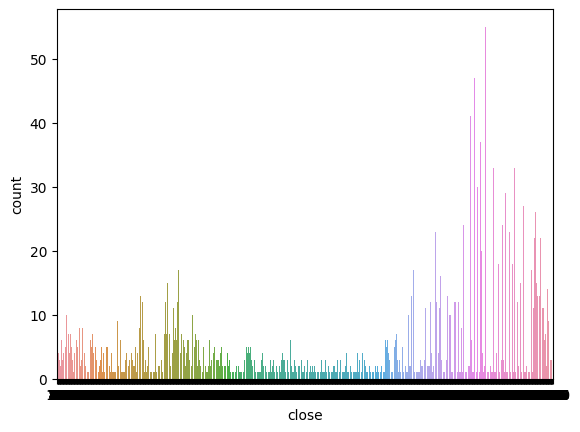

In [203]:
sns.countplot(data=df,x='close')

<Axes: xlabel='close', ylabel='Density'>

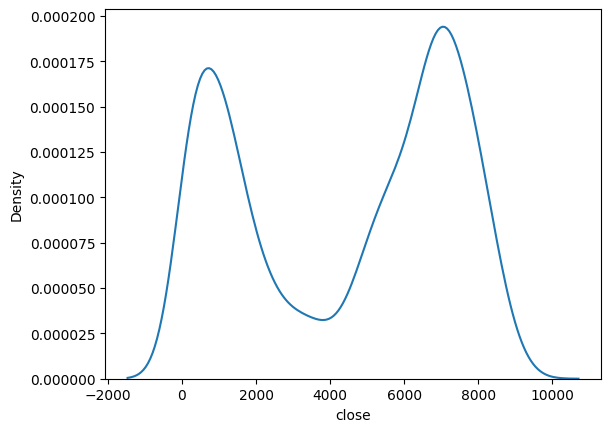

In [204]:
sns.kdeplot(data=df,x='close')

<Axes: xlabel='close'>

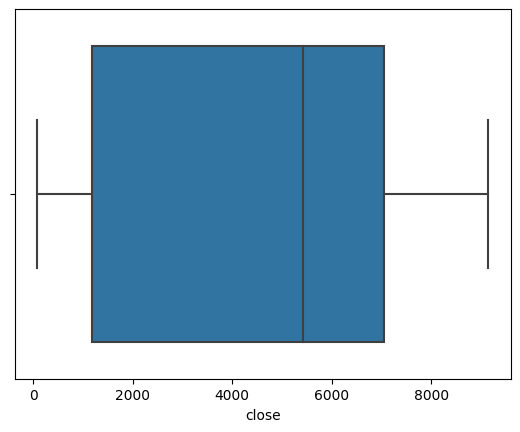

In [205]:
sns.boxplot(data=df,x='close')

<Axes: xlabel='timestamp', ylabel='close'>

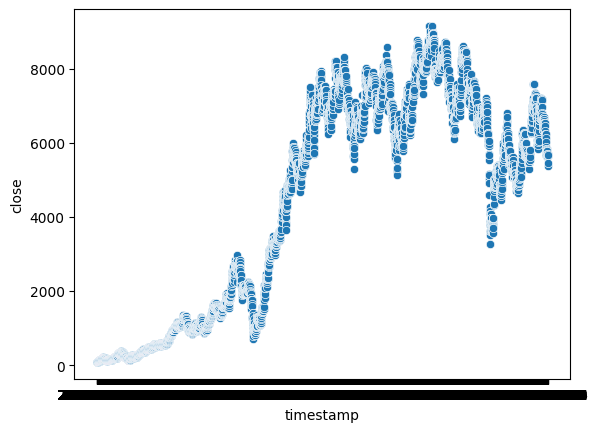

In [206]:
sns.scatterplot(data=df,x='timestamp',y='close')

## Cleaning Data ##

In [6]:
# Missing values
df[:'2023-01-06'].isnull().sum()

open      0
low       0
high      0
close     0
volume    0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5925 entries, 2001-04-16 to 2023-12-29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    5670 non-null   float64
 1   low     5670 non-null   float64
 2   high    5670 non-null   float64
 3   close   5670 non-null   float64
 4   volume  5670 non-null   float64
dtypes: float64(5)
memory usage: 406.8 KB


## Eksperimen ##

In [8]:
df.head()

,open,low,high,close,volume
timestamp,,,,,
2001-04-16,254.0,249.0,254.0,249.0,1136631.0
2001-04-17,249.0,249.0,249.0,249.0,1280013.0
2001-04-18,244.0,244.0,249.0,249.0,75601.0
2001-04-19,249.0,234.0,249.0,239.0,3686230.0
2001-04-20,230.0,210.0,230.0,220.0,3594987.0


In [7]:
tahun1=2001
prediktor='close'

In [8]:
std = (df.loc[:'2023-01-06'][[prediktor]].std()).item()
mean = (df.loc[:'2023-01-06'][[prediktor]].mean()).item()
print("nilai std =", std)
print("nilai mean =", mean)

nilai std = 622.40598293051
nilai mean = 902.2961199294533


In [9]:
def normalized_data(prices, mean, std):
  # mean = np.mean(prices)
  # std = np.std(prices)
  prices = [(prices[i] - mean) / std for i in range(0, len(prices))]
  p_tilda = prices[0]
  prices = [(prices[i] - prices[0]) for i in range(0, len(prices))]
  
  return prices, p_tilda

def day_year(df, list, tahun1):
  day = []
  for i in range(1, len(list)+1):
    day.append(i)
  df['Day'] = day
  df['Year'] = df.index.year
  return df

In [10]:
dfs = []          
n = []            
p_t = []      

for i in range(23):
    # List dataframe setiap tahun
    df_i = df.loc[df.index.year == tahun1 + i]
    dfs.append(df_i)

    # List data normalized close dan nilai p_tilda setiap tahun
    norm, p_tilda = normalized_data(np.array(dfs[i][prediktor]), mean, std)
    n.append(norm)
    p_t.append(p_tilda)

    # Penambahan kolom normalized close pada dataframe setiap tahun
    dfs[i]['Normalized Close'] = np.array(n[i])

    # Penambahan kolom day dan year pada dataframe setiap tahun
    dfs[i] = day_year(dfs[i], n[i], tahun1)

In [11]:
data = pd.concat([dfs[0], dfs[1], dfs[2], dfs[3], dfs[4], dfs[5], dfs[6], dfs[7], dfs[8], dfs[9], dfs[10], dfs[11], dfs[12], dfs[13], dfs[14], dfs[15], dfs[16], dfs[17], dfs[18], dfs[19], dfs[20], dfs[21], dfs[22]], ignore_index=False)
data.head()
data.to_csv("datanormalized_ASGR.csv", index=False)

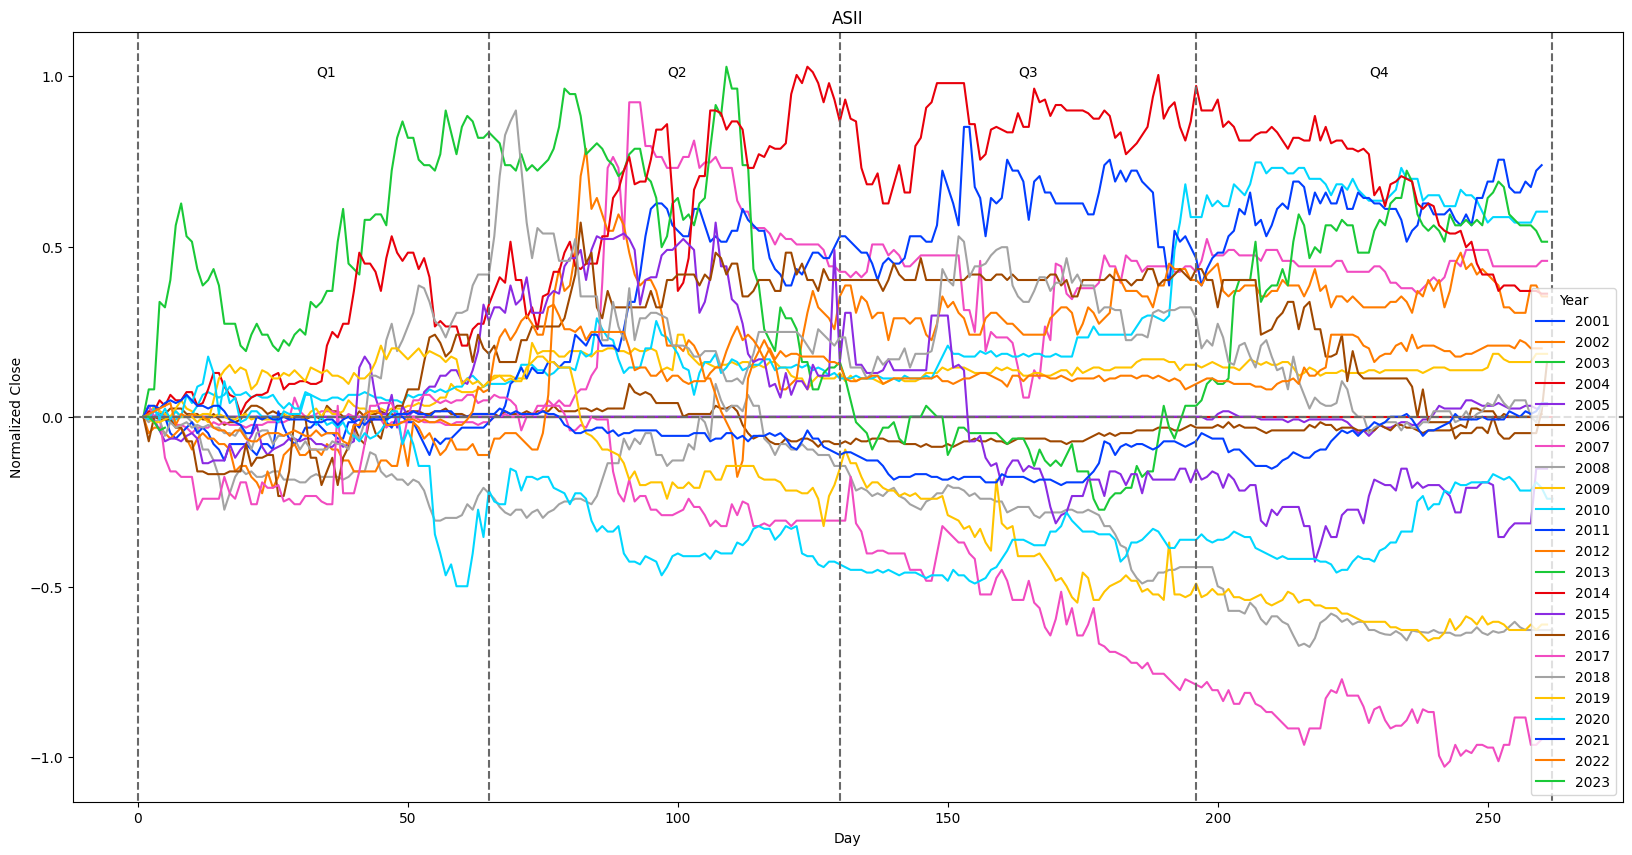

In [12]:
plt.figure(figsize = (20,10))
sns.lineplot(data=data, x = 'Day', y = 'Normalized Close', hue = 'Year', palette = 'bright')

plt.axvline(x = 0, ymin = -1, ymax = 1, linestyle = '--', color = 'dimgray')
plt.axhline(y = 0, xmin = 0, xmax = 270, linestyle = '--', color = 'dimgray')

plt.axvline(x = 65, ymin = -1, ymax = 1, linestyle = '--', color = 'dimgray')
plt.text(33, 1, 'Q1')
plt.axvline(x = 130, ymin = -1, ymax = 1, linestyle = '--', color = 'dimgray')
plt.text(98, 1, 'Q2')
plt.axvline(x = 196, ymin = -1, ymax = 1, linestyle = '--', color = 'dimgray')
plt.text(163, 1, 'Q3')
plt.axvline(x = 262, ymin = -1, ymax = 1, linestyle = '--', color = 'dimgray')
plt.text(228, 1, 'Q4')

plt.title("ASII")
plt.show()

Prediksi

In [13]:
def RBF_kernel(xn, xm, l, sigma):
    K = (sigma**2)*(np.exp(-np.linalg.norm(xn - xm)**2 / (2 * l**2)))
    return K
def make_RBF_kernel(X, l, sigma):
    K = np.zeros([len(X), len(X)])
    for i in range(len(X)):
        for j in range(len(X)):
            K[i, j] = RBF_kernel(X[i], X[j], l, sigma)
    return K + sigma * np.eye(len(K))

In [14]:
# Inverse Normalized
def inverse_normalized(df, p_t, mean, std):
  z = df + p_t
  z1 = z * std + mean
  return z1 

In [15]:
# Variabel Target, Variabel Prediktor
X = data[['Day','Year']]
y = data['Normalized Close']

# Split
Xtrain = X[:'2021-12-31']
Xtest = X['2022-01-01':]
ytrain = y[:'2021-12-31']
ytest = y['2022-01-01':]

In [16]:
# Fitting Model
# Define Kernel dan Model
kernel = 1.0 * RBF(length_scale=1.0)
gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)

# gpr = GaussianProcessRegressor()
gpr.fit(Xtrain, ytrain)

gpr_mean1, gpr_std1 = gpr.predict(Xtest, return_std = True)

In [17]:
df_gpr_mean = pd.DataFrame(gpr_mean1)
df_gpr_mean_new = df_gpr_mean[df_gpr_mean.index < 260]

In [18]:
pd.set_option('display.max_rows', 10)

In [19]:
print(f"Kernel parameters sebelum fitting: {kernel})")
print(
    f"Kernel parameters setelah fitting: {gpr.kernel_} \n"
    f"Nilai Log-likelihood: {gpr.log_marginal_likelihood(gpr.kernel_.theta):.3f}"
)
print('Nilai MSE =', mean_squared_error(y['2022-01-01':'2022-12-31'], df_gpr_mean_new))

Kernel parameters sebelum fitting: 1**2 * RBF(length_scale=1))
Kernel parameters setelah fitting: 0.327**2 * RBF(length_scale=0.8) 
Nilai Log-likelihood: -107.859
Nilai MSE = 0.02906138352811595


In [20]:
l = 0.8
sigma = 0.327

In [21]:
# Matriks Kovariansi
X_train_array = np.array(Xtrain)
X_test_array = np.array(Xtest)
kernel_RBF = make_RBF_kernel(np.vstack([X_train_array, X_test_array]), l, sigma)
print(kernel_RBF)

[[0.433929   0.04895566 0.00469813 ... 0.         0.         0.        ]
 [0.04895566 0.433929   0.04895566 ... 0.         0.         0.        ]
 [0.00469813 0.04895566 0.433929   ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.433929   0.04895566 0.00469813]
 [0.         0.         0.         ... 0.04895566 0.433929   0.04895566]
 [0.         0.         0.         ... 0.00469813 0.04895566 0.433929  ]]


In [22]:
df_gpr_std=pd.DataFrame(gpr_std1)

In [23]:
XX=Xtest['Day']
X22=XX['2022-01-03':'2022-12-31']
YY=ytest
Yactual22=YY['2022-01-03':'2022-12-31']
Ypredict22=df_gpr_mean[0:260]
gpr22=df_gpr_std[0:260]

In [24]:
XX.to_csv('Xtest_ASGR.csv', index=False)
YY.to_csv('ytest_ASGR.csv', index=False)
df_gpr_mean.to_csv('gprmean_ASGR.csv', index=False)
df_gpr_std.to_csv('gprstd_ASGR.csv', index=False)

In [25]:
#Selang Kepercayaan 95%
df_conf = pd.DataFrame()
df_conf['Lower'] = Ypredict22 - 1.96 * gpr22
df_conf['Upper'] = Ypredict22 + 1.96 * gpr22
df_conf.index = X22

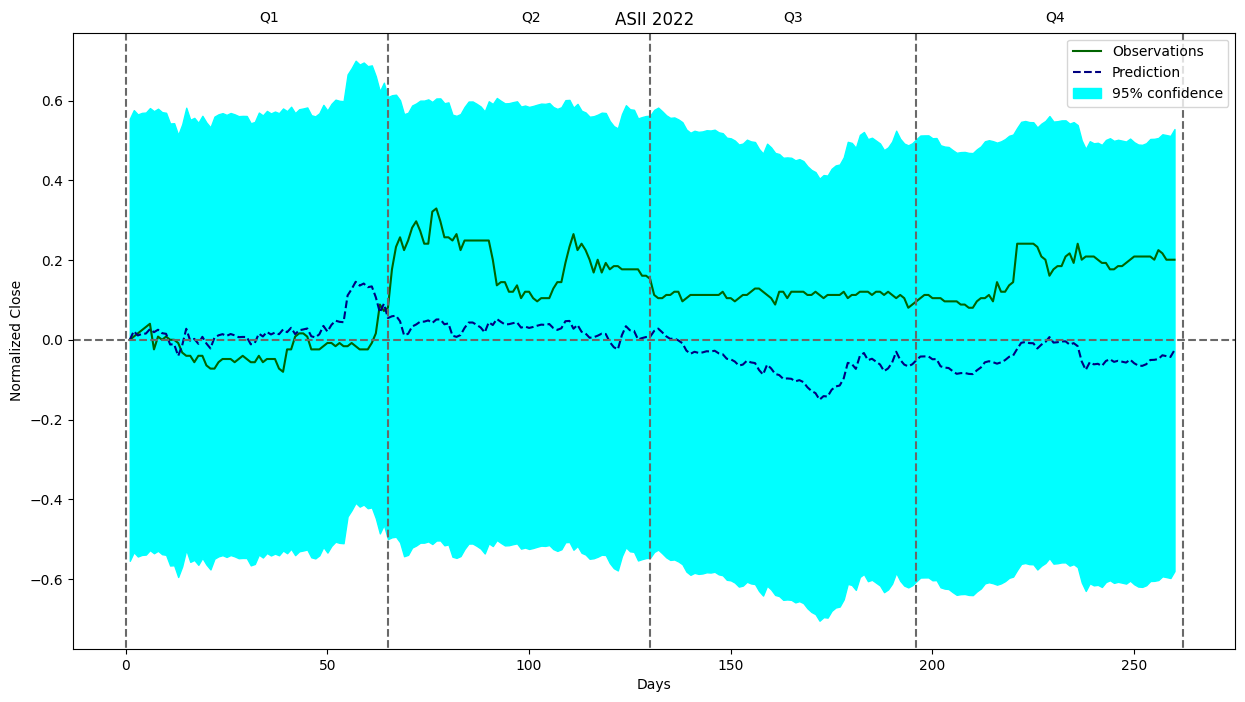

In [26]:
# Plotting hasil prediksi Q1, Q2, Q3, dan Q4

plt.figure(figsize = (15,8))
plt.plot(X22, Yactual22, label=r"Observations", color = 'darkgreen')
plt.plot(X22, Ypredict22, label="Prediction", color='navy', linestyle='--')
plt.axvline(x = 0, ymin = -1, ymax = 1, linestyle = '--', color = 'dimgray')
plt.axhline(y = 0, xmin = 0, xmax = 270, linestyle = '--', color = 'dimgray')
plt.axvline(x = 65, ymin = -1, ymax = 1, linestyle = '--', color = 'dimgray')
plt.text(33, 0.8, 'Q1')
plt.axvline(x = 130, ymin = -1, ymax = 1, linestyle = '--', color = 'dimgray')
plt.text(98, 0.8, 'Q2')
plt.axvline(x = 196, ymin = -1, ymax = 1, linestyle = '--', color = 'dimgray')
plt.text(163, 0.8, 'Q3')
plt.axvline(x = 262, ymin = -1, ymax = 1, linestyle = '--', color = 'dimgray')
plt.text(228, 0.8, 'Q4')
plt.fill_between(
    df_conf.index,
    df_conf['Lower'],
    df_conf['Upper'],
    label=r"95% confidence", color = 'cyan')
plt.legend()
plt.xlabel("Days")
plt.ylabel("Normalized Close")
plt.title("ASII 2022")
plt.show()

In [27]:
df_gpr_mean = pd.DataFrame(gpr_mean1)
pred = inverse_normalized(df_gpr_mean, p_t[22], mean, std)
pred.columns = ['Close Prediction']
output_file = "pred_close_ASGR.csv"
pred.to_csv(output_file, index=False)

In [168]:
# Menambahkan kolom baru hasil prediksi
dfs[22]['Close Prediction'] = np.nan
dfs[22]['Close Prediction'] = np.array(pred).ravel()
dfs[22].head()

ValueError: Length of values (520) does not match length of index (260)